In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
from matplotlib import pyplot as plt
import os

random.seed(123)

In [3]:
rootdir = '/lustre/groups/ml01/workspace/anastasia.litinetskaya/experiments/integration/trimodal/covariates/'

In [4]:
results = {}

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith("metrics.csv"):
            n_features = subdir.split('/')[-1].split('-')[0]
            name = filepath.split('/')[-1][:-12]
            df = pd.read_csv(filepath)
            df = df.set_index('Unnamed: 0')
            if name not in results:
                results[name] = {}
            results[name][n_features] = df['0']['overall']

In [5]:
df = pd.DataFrame(results)
df = df.sort_index()
df = df.reindex(['modality', 'samplename_no_integ', 'samplename2', 'no_integ1', 'samplename_modality3', 'baseline'])
df

,reference_CITE-seq_query,reference_snRNA-seq_query,train,reference_ATAC-seq_query,reference_query,reference_scRNA-seq_query,reference_multiome_query
modality,0.705153,0.712869,0.727565,0.709451,0.697636,0.722873,0.717219
samplename_no_integ,0.708644,0.658713,0.723864,0.632762,0.677724,0.676884,0.702805
samplename2,0.727714,0.698806,0.732274,0.700156,0.695878,0.716585,0.710634
no_integ1,0.743093,0.747601,0.755340,0.752005,0.758595,0.749757,0.749880
samplename_modality3,0.755806,0.716587,0.759891,0.714427,0.721897,0.727584,0.759464
baseline,0.747717,0.743667,0.759303,0.747575,0.753552,0.759151,0.751158


In [6]:
df = df[['train', 
         'reference_CITE-seq_query', 
         'reference_multiome_query', 
         'reference_scRNA-seq_query', 
         'reference_ATAC-seq_query',
         'reference_snRNA-seq_query']]

In [7]:
df = df.rename(columns={
    'reference_CITE-seq_query': 'CITE-seq mapping', 
    'reference_snRNA-seq_query': 'snRNA-seq mapping', 
    'train': 'reference building',
    'reference_ATAC-seq_query': 'ATAC-seq mapping', 
    'reference_scRNA-seq_query': 'scRNA-seq mapping', 
    'reference_multiome_query': 'multiome mapping'
})

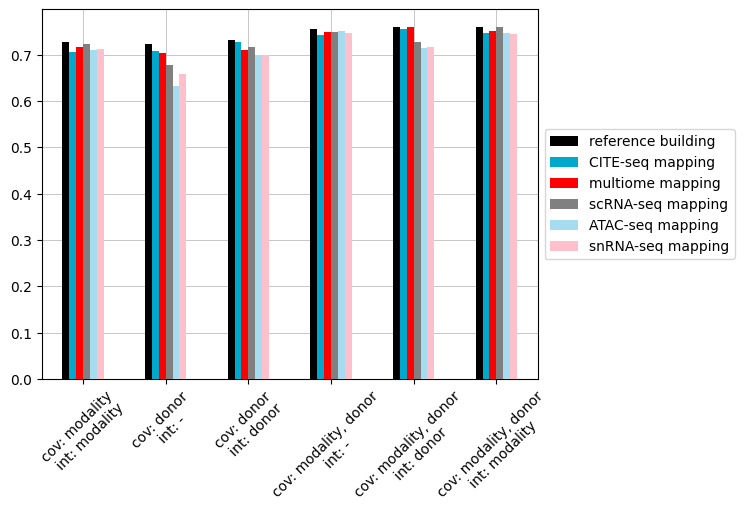

In [8]:
ax = df.plot(kind='bar', rot=45, zorder=3, color=["black", "#00a8cc", "red",  "gray", "#a6dcef", "#FFC0CB"])
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels([
    'cov: modality\n int: modality', 
    'cov: donor\n int: -', 
    'cov: donor\n int: donor', 
    'cov: modality, donor\n int: -', 
    'cov: modality, donor\n int: donor', 
    'cov: modality, donor\n int: modality'
])
ax.grid(zorder=0, linewidth=0.5)
plt.savefig('figures/robustness_cov_selection.svg', bbox_inches='tight')